In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direct

In [5]:
filename = '/content/gdrive/MyDrive/MyLecture/2023/2학기/데이터처리프로그래밍/12-2주차/주요발생국가주간동향(4월2째주).csv'

In [6]:
data = pd.read_csv(filename, index_col='국가', encoding='CP949')
print(data)

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512


In [7]:
print(data.columns)

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')


In [8]:
chartdata = data['4월06일']
chartdata

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

In [9]:
type(chartdata)

pandas.core.series.Series

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

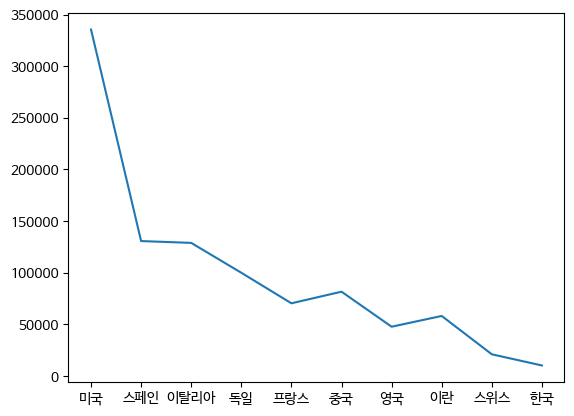

In [11]:
plt.plot(chartdata)

Text(0.5, 1.0, '4월 6일 코로나 발생 건수')

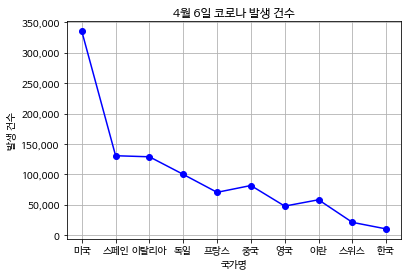

In [ ]:
YTICKS_INTERVAL = 50000
maxlim = (int(chartdata.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
plt.plot(chartdata, color='blue', linestyle='solid', marker='o')
values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)
plt.yticks(values, ['%s' % format(val, ',') for val in values])
plt.grid(True)
plt.xlabel('국가명')

plt.ylabel("발생 건수")
plt.title('4월 6일 코로나 발생 건수')

In [12]:
COUNTRY = ['스페인', '프랑스', '독일', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']
chartdata = data.loc[COUNTRY, WHEN]
chartdata = chartdata.T
chartdata.columns

Index(['스페인', '프랑스', '독일', '중국', '영국', '이란'], dtype='object', name='국가')

In [13]:
chartdata

국가,스페인,프랑스,독일,중국,영국,이란
4월06일,130709,70478,100024,81708,47806,58226
4월07일,135032,74390,102453,81740,51608,60500
4월08일,140510,78167,107591,81802,55242,62589
4월09일,146690,82048,112113,81865,60733,64586
4월10일,152446,86334,118181,81907,65077,66220


Text(0.5, 1.0, '일자별 국가명 꺽은 선')

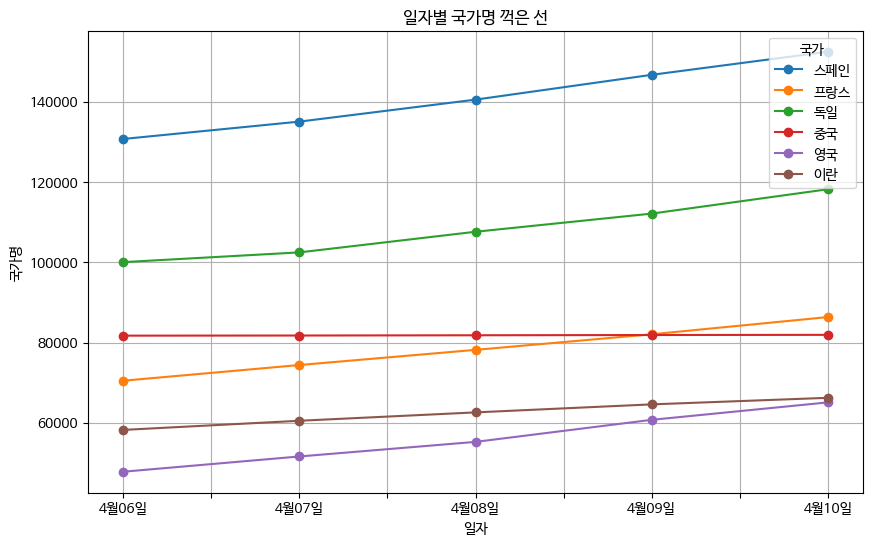

In [14]:
chartdata.plot(title='SomeTitie', figsize=(10, 6), legend = True, marker='o', rot=0)
plt.grid(True)
plt.xlabel('일자')
plt.ylabel('국가명')
plt.title('일자별 국가명 꺽은 선')

In [15]:
data = pd.read_csv(filename, index_col='국가', encoding='cp949')
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [16]:
chartdata = data['4월06일']
chartdata

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

<BarContainer object of 10 artists>

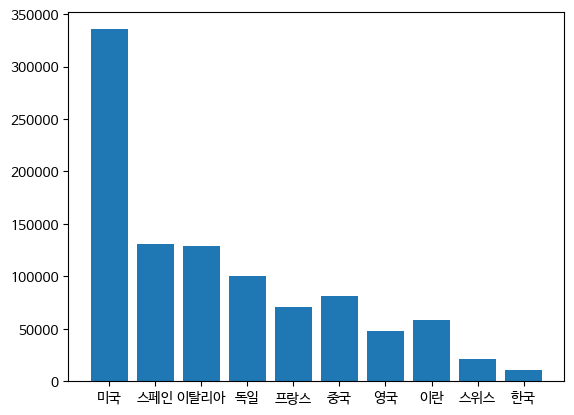

In [17]:
plt.bar(chartdata.index, chartdata)

In [ ]:
# plt.bar() 메소드를 사용한 막대 그래프
def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    plt.figure()
    plt.bar(x, y, color=color, alpha=0.7)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.grid(True)

    YTICKS_INTERVAL = 50000

    maxlim = (int(y.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
    print(maxlim)

    values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)

    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # 그래프 위에 건수와 비율 구하기
    ratio = 100 * y / y.sum()
    print(ratio)


    plt.rc('font', size=6)
    for idx in range(y.size):
        value = format(y[idx], ',') + '건'  # 예시 : 60건
        ratioval = '%.1f%%' % (ratio[idx])  # 예시 : 20.0%
        # 그래프의 위에 "건수" 표시
        plt.text(x=idx, y=y[idx] + 1, s=value, horizontalalignment='center')
        # 그래프의 중간에 비율 표시
        plt.text(x=idx, y=y[idx] / 2, s=ratioval, horizontalalignment='center')

    # 평균 값을 수평선으로 그리기
    meanval = y.mean()
    print(meanval)

    average = '평균 : %d건' % meanval
    plt.axhline(y=meanval, color='r', linewidth=1, linestyle='dashed')
    plt.text(x=y.size - 1, y=meanval + 200, s=average, horizontalalignment='center')

# def MakeBarChart01

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
mycolor = colors[0:len(chartdata)]

350000
국가
미국      34.069888
스페인     13.272496
이탈리아    13.093680
독일      10.156670
프랑스      7.156500
중국       8.296820
영국       4.854332
이란       5.912403
스위스      2.142949
한국       1.044261
Name: 4월06일, dtype: float64
98481.1


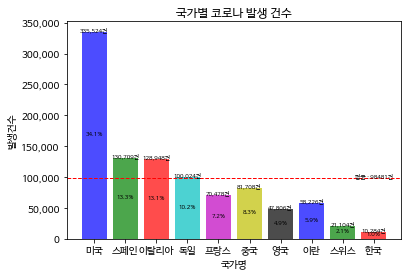

In [ ]:
MakeBarChart01(x=chartdata.index, y=chartdata, color=mycolor, xlabel='국가명',
               ylabel='발생건수', title='국가별 코로나 발생 건수')

In [18]:
data = pd.read_csv(filename, index_col='국가', encoding='CP949')
print(data.columns)

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')


In [19]:
my_concern = [item for item in data.index if item in ['독일', '프랑스', '중국', '영국']]
print(my_concern)

['독일', '프랑스', '중국', '영국']


In [20]:
data = data.loc[my_concern]
chartdata = data['4월06일']

print(chartdata)

국가
독일     100024
프랑스     70478
중국      81708
영국      47806
Name: 4월06일, dtype: int64


In [21]:
print(type(chartdata))

mylabel = chartdata.index

print(mylabel)

<class 'pandas.core.series.Series'>
Index(['독일', '프랑스', '중국', '영국'], dtype='object', name='국가')


([<matplotlib.patches.Wedge at 0x7914cc334ac0>,
 [Text(0.5498138171799437, 0.9527354126083587, ''),
  Text(-1.0479681286057179, 0.3343094396313536, ''),
  Text(-0.3103237957978454, -1.0553194501010665, ''),
  Text(0.9650260345855531, -0.5279438914999236, '')])

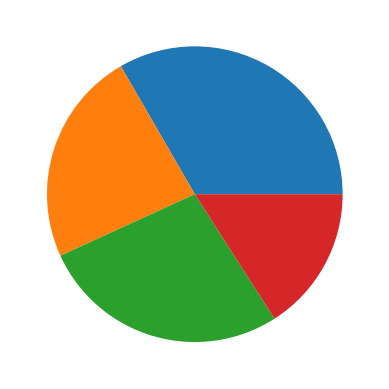

In [22]:
plt.pie(chartdata)

test 파일이 저장되었습니다.


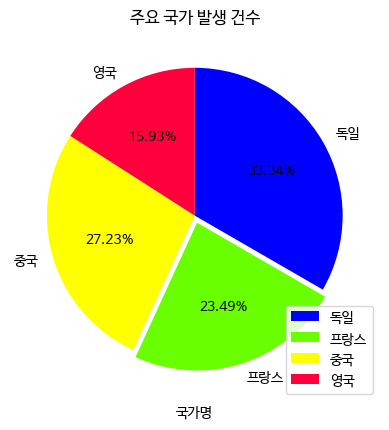

In [25]:
mycolors = ['blue', '#6AFF00', 'yellow', '#FF003C']

plt.figure()

plt.pie(chartdata, labels=mylabel, shadow=False, explode=(0, 0.05, 0, 0),
        colors=mycolors, autopct='%1.2f%%', startangle=90, counterclock=False)

plt.grid(True)
plt.legend(loc=4)
plt.xlabel('국가명')
# plt.ylabel("발생 건수")
plt.title('주요 국가 발생 건수')

CHART_NAME = 'test'
savefile = CHART_NAME
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')